[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/ML-AI-for-the-Working-Analyst/blob/main/Semana10/NN_Img_Numerico_parte2.ipynb)

# Introducción

Los datos que utilizaremos combinan 2 tipos de datos que hemos usado previamente pero no en conjunto: Imágenes y Características.

El dataset se compone de datos de propiedades en Francia. En los datos tenemos variables predictoras como el tamaño del inmueble, el tamaño de terreno que incluye, número de baños, etc. Además, cada inmueble cuenta con imágenes, que serán vectorizadas para tratar de obtener una buena predicción del precio de los mismos.

Datos en el siguiente [enlace](https://challengedata.ens.fr/participants/challenges/68/).

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
features = pd.read_csv('/content/drive/MyDrive/Curso-WorkingAnalyst/semana10/X_train_J01Z4CN.csv', index_col='id_annonce')

In [ ]:
targets = pd.read_csv('/content/drive/MyDrive/Curso-WorkingAnalyst/semana10/y_train_OXxrJt1.csv', index_col='id_annonce')

In [ ]:
features

,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,energy_performance_category,...,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
id_annonce,,,,,,,,,,,,,,,,,,,,,
35996577,appartement,43.643880,7.117183,villeneuve-loubet,6270,63.0,NaN,NaN,NaN,NaN,...,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35811033,appartement,45.695757,4.895610,venissieux,69200,90.0,3.0,NaN,223.0,D,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35731841,maison,47.966791,-1.220451,moutiers,35130,61.0,NaN,370.0,NaN,NaN,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35886765,maison,47.289292,-1.878805,cordemais,44360,142.0,NaN,764.0,217.0,D,...,0.0,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35781137,appartement,45.718992,4.844234,lyon-7eme,69007,88.0,3.0,NaN,NaN,NaN,...,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35881571,appartement,43.480292,-1.484324,bayonne,64100,2995.0,NaN,NaN,255.0,E,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35890109,appartement,48.861391,2.401158,paris-20eme,75020,36.0,4.0,NaN,229.0,D,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36010245,appartement,44.397837,-1.164312,biscarrosse,40600,99.0,2.0,NaN,NaN,NaN,...,1.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
targets

,price
id_annonce,
35996577,355000.0
35811033,190000.0
35731841,39000.0
35886765,299000.0
35781137,478000.0
...,...
35881571,190000.0
35890109,399000.0
36010245,328000.0


In [ ]:
# Ver en que tipo de dato se guardan los índices

targets.index.dtype

dtype('int64')

In [ ]:
# Revisar cantidad de datos nulos (bruto o porcentual)

to_drop = features.isnull().sum()/len(features)
to_drop

property_type                  0.000000
approximate_latitude           0.000000
approximate_longitude          0.000000
city                           0.000000
postal_code                    0.000000
size                           0.013702
floor                          0.739269
land_size                      0.583039
energy_performance_value       0.489724
energy_performance_category    0.489724
ghg_value                      0.504121
ghg_category                   0.504121
exposition                     0.756637
nb_rooms                       0.041908
nb_bedrooms                    0.073137
nb_bathrooms                   0.355197
nb_parking_places              0.000000
nb_boxes                       0.000000
nb_photos                      0.000000
has_a_balcony                  0.000000
nb_terraces                    0.000000
has_a_cellar                   0.000000
has_a_garage                   0.000000
has_air_conditioning           0.000000
last_floor                     0.000000


In [ ]:
to_drop[to_drop > .40]

floor                          0.739269
land_size                      0.583039
energy_performance_value       0.489724
energy_performance_category    0.489724
ghg_value                      0.504121
ghg_category                   0.504121
exposition                     0.756637
dtype: float64

In [ ]:
index_to_drop = to_drop[to_drop > .40].index.drop('land_size')

In [ ]:
index_to_drop

Index(['floor', 'energy_performance_value', 'energy_performance_category',
       'ghg_value', 'ghg_category', 'exposition'],
      dtype='object')

In [ ]:
features.drop(columns=index_to_drop, inplace=True)
features

,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,land_size,nb_rooms,nb_bedrooms,nb_bathrooms,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
id_annonce,,,,,,,,,,,,,,,,,,,,
35996577,appartement,43.643880,7.117183,villeneuve-loubet,6270,63.0,NaN,3.0,2.0,NaN,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35811033,appartement,45.695757,4.895610,venissieux,69200,90.0,NaN,5.0,4.0,NaN,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35731841,maison,47.966791,-1.220451,moutiers,35130,61.0,370.0,2.0,1.0,NaN,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35886765,maison,47.289292,-1.878805,cordemais,44360,142.0,764.0,4.0,3.0,NaN,0.0,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35781137,appartement,45.718992,4.844234,lyon-7eme,69007,88.0,NaN,4.0,3.0,1.0,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35881571,appartement,43.480292,-1.484324,bayonne,64100,2995.0,NaN,1.0,NaN,1.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35890109,appartement,48.861391,2.401158,paris-20eme,75020,36.0,NaN,2.0,1.0,NaN,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36010245,appartement,44.397837,-1.164312,biscarrosse,40600,99.0,NaN,4.0,3.0,NaN,1.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Imprimir la cantidad de Columnas que nos quedan
features.columns

Index(['property_type', 'approximate_latitude', 'approximate_longitude',
       'city', 'postal_code', 'size', 'land_size', 'nb_rooms', 'nb_bedrooms',
       'nb_bathrooms', 'nb_parking_places', 'nb_boxes', 'nb_photos',
       'has_a_balcony', 'nb_terraces', 'has_a_cellar', 'has_a_garage',
       'has_air_conditioning', 'last_floor', 'upper_floors'],
      dtype='object')

¿Que datos sugieres tomar y porqué?

In [ ]:
# Limpieza de valores nulos por columnas y luego por filas



In [ ]:
to_drop_2 = features.property_type.value_counts()[4:].index
to_drop_2

Index(['villa', 'propriété', 'terrain à bâtir', 'duplex', 'viager', 'ferme',
       'parking', 'loft', 'chalet', 'château', 'moulin', 'manoir', 'péniche',
       'hôtel particulier', 'chambre', 'gîte', 'atelier', 'hôtel'],
      dtype='object')

In [ ]:
features = features[~features.property_type.isin(to_drop_2)]
features

,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,land_size,nb_rooms,nb_bedrooms,nb_bathrooms,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
id_annonce,,,,,,,,,,,,,,,,,,,,
35996577,appartement,43.643880,7.117183,villeneuve-loubet,6270,63.0,NaN,3.0,2.0,NaN,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35811033,appartement,45.695757,4.895610,venissieux,69200,90.0,NaN,5.0,4.0,NaN,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35731841,maison,47.966791,-1.220451,moutiers,35130,61.0,370.0,2.0,1.0,NaN,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35886765,maison,47.289292,-1.878805,cordemais,44360,142.0,764.0,4.0,3.0,NaN,0.0,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35781137,appartement,45.718992,4.844234,lyon-7eme,69007,88.0,NaN,4.0,3.0,1.0,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35824079,appartement,46.259829,6.109434,ferney-voltaire,1210,95.0,NaN,4.0,3.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35881571,appartement,43.480292,-1.484324,bayonne,64100,2995.0,NaN,1.0,NaN,1.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35890109,appartement,48.861391,2.401158,paris-20eme,75020,36.0,NaN,2.0,1.0,NaN,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


¿Vale la pena tomar datos geográficos? ¿Bajo que condiciones?

In [ ]:
# Drop de las columnas 'approximate_latitude', 'approximate_longitude', 'city', 'postal_code'

features = features.drop(columns=['approximate_latitude', 'approximate_longitude', 'city', 'postal_code'])

In [ ]:
# Deshacerme por filas
features = features.dropna()

In [ ]:
features.property_type.value_counts()

maison         9139
appartement     520
terrain         434
divers           50
Name: property_type, dtype: int64

In [ ]:
# Dummies

features = pd.get_dummies(features)

In [ ]:
features

,size,land_size,nb_rooms,nb_bedrooms,nb_bathrooms,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors,property_type_appartement,property_type_divers,property_type_maison,property_type_terrain
id_annonce,,,,,,,,,,,,,,,,,,,
36058309,110.0,392.0,4.0,3.0,1.0,1.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
35999115,100.0,78.0,4.0,3.0,1.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
36042341,147.0,439.0,5.0,6.0,1.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
35738297,102.0,229.0,5.0,3.0,1.0,0.0,0.0,9.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,1,0
35805297,110.0,335.0,5.0,2.0,1.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32535599,120.0,524.0,5.0,3.0,1.0,1.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
32781341,250.0,1600.0,5.0,4.0,1.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
36046569,125.0,202.0,5.0,4.0,1.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0


In [ ]:
features.columns

Index(['size', 'land_size', 'nb_rooms', 'nb_bedrooms', 'nb_bathrooms',
       'nb_parking_places', 'nb_boxes', 'nb_photos', 'has_a_balcony',
       'nb_terraces', 'has_a_cellar', 'has_a_garage', 'has_air_conditioning',
       'last_floor', 'upper_floors', 'property_type_appartement',
       'property_type_divers', 'property_type_maison',
       'property_type_terrain'],
      dtype='object')

In [ ]:
# Eliminamos bastante, pero nos quedan 10,000 datos para trabajar con imágenes, un número decente
features.isnull().sum().sum()

0

# Carga de imágenes

Aquí utilizaremos los ID de los features, para extraer las imágenes que nos convengan del archivo zip, por ahora solo extraremos una imagen por cada índice

In [ ]:
import zipfile
import os

from skimage import io
from skimage.transform import resize

from matplotlib import image
import matplotlib.pyplot as plt

In [ ]:
archive = zipfile.ZipFile('/content/drive/MyDrive/Curso-WorkingAnalyst/semana10/reduced_images_ILB.zip', 'r')

In [ ]:
# Extrae todo lo que hay en el .zip. Es temporal, a menos que a ".extractall" le pasen como argumento
# alguna dirección donde quieren guardar sus archivos en Drive.
# Ejemplo: archive.extractall('/content/drive/su_carpeta')

# 1 min 7 seg
archive.extractall()

In [ ]:
# Lista de los nombres de carpetas, para relacionarlo con los ID de los csv cargados al principio
carpetas_imgs = features.index

In [ ]:
carpetas_imgs

Int64Index([36058309, 35999115, 36042341, 35738297, 35805297, 35997109,
            36003641, 36013375, 35765901, 35800669,
            ...
            36038313, 35776739, 35845473, 35844993, 35755849, 32535599,
            32781341, 36046569, 35655751, 35884551],
           dtype='int64', name='id_annonce', length=10143)

In [ ]:
len(carpetas_imgs)

10143

In [ ]:
# Cargamos las imagenes (46s) TENER CUIDADO DE USARLO CON NO TANTAS IMAGENES

indexs = []
list_imgs = []
for image_id in carpetas_imgs:
  path = '/content/reduced_images/train/' + 'ann_' + str(image_id)
  
  # Obtiene todas las imagenes dentro del path dado
  img_names = os.listdir(path)

  indexs.append(image_id)

  image_array = image.imread(path + '/' + img_names[0])
  #image_array = resize(image_array, (160, 120)) # En general esta linea puede dar problemas de RAM, dependiendo hay que decidir como reescalar


  list_imgs.append([image_array])

In [ ]:
print(len(list_imgs))
print('-------')
print(len(indexs))

10143
-------
10143


In [ ]:
df_images = pd.DataFrame(list_imgs, index=indexs, columns=['image_array'])

In [ ]:
df_images

,image_array
36058309,"[[[101, 108, 116], [104, 108, 117], [105, 109,..."
35999115,"[[[206, 210, 219], [206, 210, 219], [205, 209,..."
36042341,"[[[177, 164, 145], [166, 155, 135], [142, 135,..."
35738297,"[[[162, 106, 89], [161, 110, 93], [168, 120, 1..."
35805297,"[[[169, 198, 180], [176, 199, 181], [186, 200,..."
...,...
32535599,"[[[57, 57, 57], [57, 57, 57], [58, 58, 58], [5..."
32781341,"[[[174, 174, 174], [174, 174, 174], [175, 175,..."
36046569,"[[[188, 205, 212], [209, 224, 231], [223, 238,..."
35655751,"[[[167, 168, 160], [167, 168, 160], [168, 169,..."


In [ ]:
df_images.iloc[0,0].shape

(114, 171, 3)

In [ ]:
# 58 seg
df_images['image_array'] = df_images['image_array'].apply(lambda x: resize(x, (96,128)))

In [ ]:
df_images.iloc[0,0].shape

(96, 128, 3)

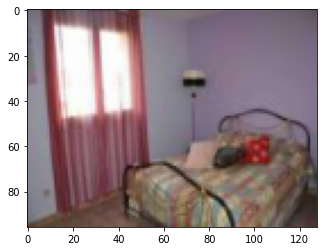

In [ ]:
plt.imshow(df_images.iloc[0,0])

¿Porqué no concatenar los DataFrames?

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [ ]:
train_id, test_id= train_test_split(indexs, train_size=0.5, random_state=0)

In [ ]:
len(train_id)

5071

In [ ]:
len(test_id)

5072

In [ ]:
train_id

In [ ]:
train_imgs = df_images.loc[train_id, :]
test_imgs = df_images.loc[test_id, :]

In [ ]:
test_imgs

,image_array
35874753,"[[[0.420138888888889, 0.4240604575163399, 0.39..."
35849899,"[[[0.8677930644914215, 0.9235672296262255, 0.9..."
35823873,"[[[0.3643847496680964, 0.295501988230188, 0.33..."
35801931,"[[[0.4206270105698536, 0.3029799517463242, 0.2..."
35826821,"[[[0.8571873085171575, 0.8448242187500005, 0.8..."
...,...
36032371,"[[[0.2655410666870906, 0.29713828890931276, 0...."
36063495,"[[[0.40938968035130596, 0.3854517718545739, 0...."
35991439,"[[[0.1598766850490195, 0.09321001838235285, 0...."
35836129,"[[[0.8352941176470587, 0.803921568627451, 0.75..."


In [ ]:
train_targets = targets.loc[train_id, :]
test_targets = targets.loc[test_id, :]

In [ ]:
test_targets

,price
id_annonce,
35874753,228780.0
35849899,206700.0
35823873,258000.0
35801931,145000.0
35826821,490000.0
...,...
36032371,288750.0
36063495,820000.0
35991439,127200.0


A veces hay problemas para utilizar estos datos para alimentar modelos, convirtamos los datos a array

In [ ]:
train_imgs_to_use = np.array([array for array in train_imgs['image_array']])

In [ ]:
test_imgs_to_use = np.array([array for array in test_imgs['image_array']])

In [ ]:
train_imgs_to_use.shape

(5071, 96, 128, 3)

# Creación de una red neuronal que usaremos

In [ ]:
model = keras.Sequential([
                             
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=16, input_shape = (96, 128, 3), kernel_size=(3,3), data_format='channels_last', activation="relu", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='relu', name='dense_1', use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(84, activation='relu', name='dense_2', use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.10),
    keras.layers.Dense(1, activation='linear', name='dense_3')

])

In [ ]:
model.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2))  #'rmsprop'

In [ ]:
model.fit(train_imgs_to_use, np.array(train_targets), epochs=200)

Epoch 1/200
159/159 [==============================] - 74s 455ms/step - loss: 355801.0625
Epoch 2/200
159/159 [==============================] - 96s 604ms/step - loss: 354770.6562
Epoch 3/200
159/159 [==============================] - 74s 467ms/step - loss: 352576.3750
Epoch 4/200
159/159 [==============================] - 79s 498ms/step - loss: 349297.2812
Epoch 5/200
159/159 [==============================] - 78s 490ms/step - loss: 344989.6875
Epoch 6/200
159/159 [==============================] - 86s 540ms/step - loss: 339721.7812
Epoch 7/200
159/159 [==============================] - 72s 451ms/step - loss: 333557.5312
Epoch 8/200
159/159 [==============================] - 71s 444ms/step - loss: 326534.0938
Epoch 9/200
159/159 [==============================] - 77s 486ms/step - loss: 318761.7500
Epoch 10/200
159/159 [==============================] - 70s 438ms/step - loss: 310421.9062
Epoch 11/200
159/159 [==============================] - 68s 430ms/step - loss: 301549.0312
Epoch 12

In [ ]:
model.save('/content/drive/MyDrive/Curso-WorkingAnalyst/semana10') # Faltó el '/model'

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Curso-WorkingAnalyst/semana10/assets


En lugar de arreglos, también podríamos haber utilizado "tensores" para alimentar nuestro modelo. A veces pueden ser mas útiles unos que otros.

In [ ]:
tensor_train = tf.convert_to_tensor(train_imgs_to_use)

In [ ]:
tensor_test = tf.convert_to_tensor(test_imgs_to_use)

In [ ]:
type(tensor_train)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
tensor_train.shape

TensorShape([5071, 96, 128, 3])

# Cargado de los pesos de un modelo ya entrenado

In [ ]:
model.load_weights('/content/drive/MyDrive/Curso-WorkingAnalyst/semana10')

In [ ]:
model.weights[-1]

<tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([41.68023], dtype=float32)>

In [ ]:
np.array(train_targets[0:20])

In [ ]:
train_pred = model.predict(train_imgs_to_use)

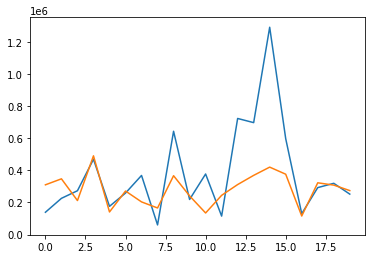

In [ ]:
plt.plot(range(20), np.array(train_targets[:20]))
plt.plot(range(20), train_pred[:20])

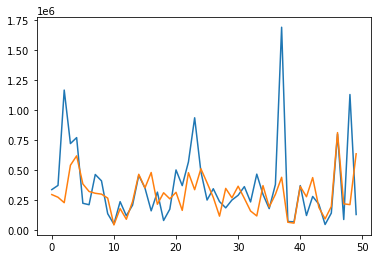

In [ ]:
plt.plot(range(50),train_targets['price'][1100:1150])
plt.plot(range(50),train_pred[1100:1150])

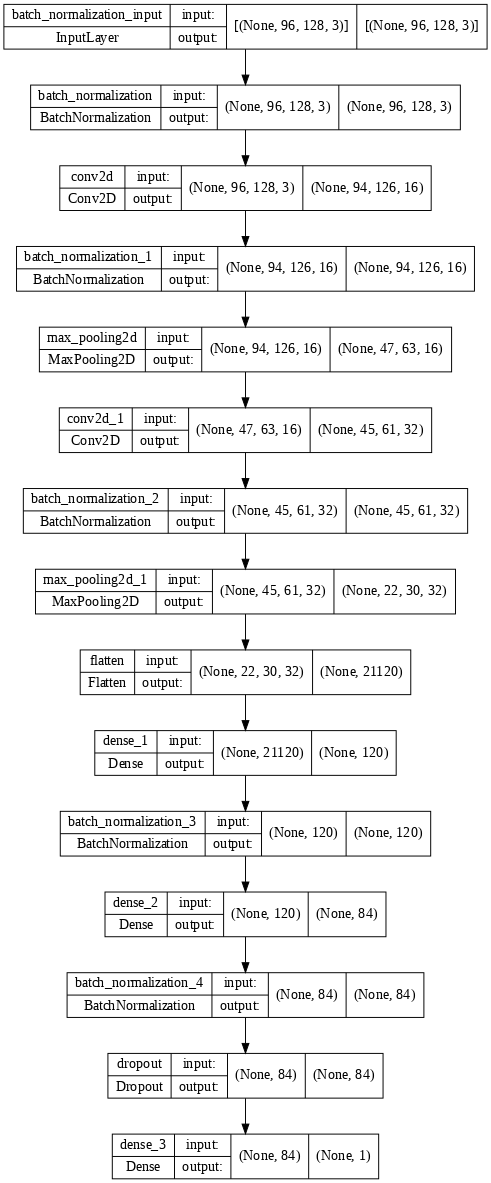

In [ ]:
keras.utils.plot_model( 
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TD",
    dpi=70,
)

# Modelo que incluye características y vectorización de la imagen

Características a usar

In [ ]:
train_features = features.loc[train_id, :]
test_features = features.loc[test_id, :]

In [ ]:
train_features.shape

(5071, 19)

In [ ]:
# '/content/drive/MyDrive/Curso-WorkingAnalyst/semana10/model_1'

In [ ]:
# Recordemos la forma de nuestros características
features.shape

(10143, 19)

In [ ]:
img_input = keras.Input(shape=(96,128,3))

normal_1 = keras.layers.BatchNormalization()(img_input)
conv_1 = keras.layers.Conv2D(filters=16, input_shape = (96, 128, 3), kernel_size=(3,3), data_format='channels_last', activation="relu", use_bias=False)(normal_1)
normal_2 = keras.layers.BatchNormalization()(conv_1)
pool_1 = keras.layers.MaxPooling2D(pool_size=(2,2))(normal_2)

conv_2 = keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", use_bias=False)(pool_1)
normal_3 = keras.layers.BatchNormalization()(conv_2)
pool_2 = keras.layers.MaxPooling2D(pool_size=(2,2))(normal_3)

flat_1 = keras.layers.Flatten()(pool_2)

dense_1 = keras.layers.Dense(120, activation='relu', use_bias=False)(flat_1)

normal_4 = keras.layers.BatchNormalization()(dense_1)
dense_2 = keras.layers.Dense(84, activation='relu', use_bias=False)(normal_4)
normal_5 = keras.layers.BatchNormalization()(dense_2)
drop_1 = keras.layers.Dropout(rate=0.10)(normal_5)
dense_3 = keras.layers.Dense(10, activation='linear')(drop_1)



In [ ]:
feats_input = keras.Input(shape=(19), name='feats_input')

In [ ]:
# Realizamos la concatenatción de vectorización de la imagen y los features utilizados
x = keras.layers.concatenate([dense_3, feats_input])

# Una red posterior para la predicción
dense_4 = keras.layers.Dense(80, activation='relu')(x)
dense_5 = keras.layers.Dense(40, activation='relu')(dense_4)

dense_6 = keras.layers.Dense(20, activation='relu')(dense_5)

pred = keras.layers.Dense(1, activation='linear')(dense_6)

In [ ]:
model_1 = keras.Model(
    inputs=[img_input, feats_input],
    outputs=[pred],
)

In [ ]:
model_1.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2))  #'rmsprop'

In [ ]:
train_targets.shape, train_imgs_to_use.shape, train_features.shape

((5071, 1), (5071, 96, 128, 3), (5071, 19))

In [ ]:
model_1.fit([train_imgs_to_use, np.array(train_features)], np.array(train_targets), epochs=200)

Epoch 1/200
159/159 [==============================] - 87s 538ms/step - loss: 260271.1562
Epoch 2/200
159/159 [==============================] - 73s 456ms/step - loss: 188675.6406
Epoch 3/200
159/159 [==============================] - 72s 452ms/step - loss: 184769.5938
Epoch 4/200
159/159 [==============================] - 73s 456ms/step - loss: 181330.2344
Epoch 5/200
159/159 [==============================] - 72s 453ms/step - loss: 178071.0625
Epoch 6/200
159/159 [==============================] - 75s 471ms/step - loss: 173669.9062
Epoch 7/200
159/159 [==============================] - 72s 452ms/step - loss: 172978.9688
Epoch 8/200
159/159 [==============================] - 72s 455ms/step - loss: 168192.8906
Epoch 9/200
159/159 [==============================] - 73s 456ms/step - loss: 165041.6562
Epoch 10/200
159/159 [==============================] - 73s 461ms/step - loss: 161620.6094
Epoch 11/200
159/159 [==============================] - 73s 459ms/step - loss: 155699.4219
Epoch 12

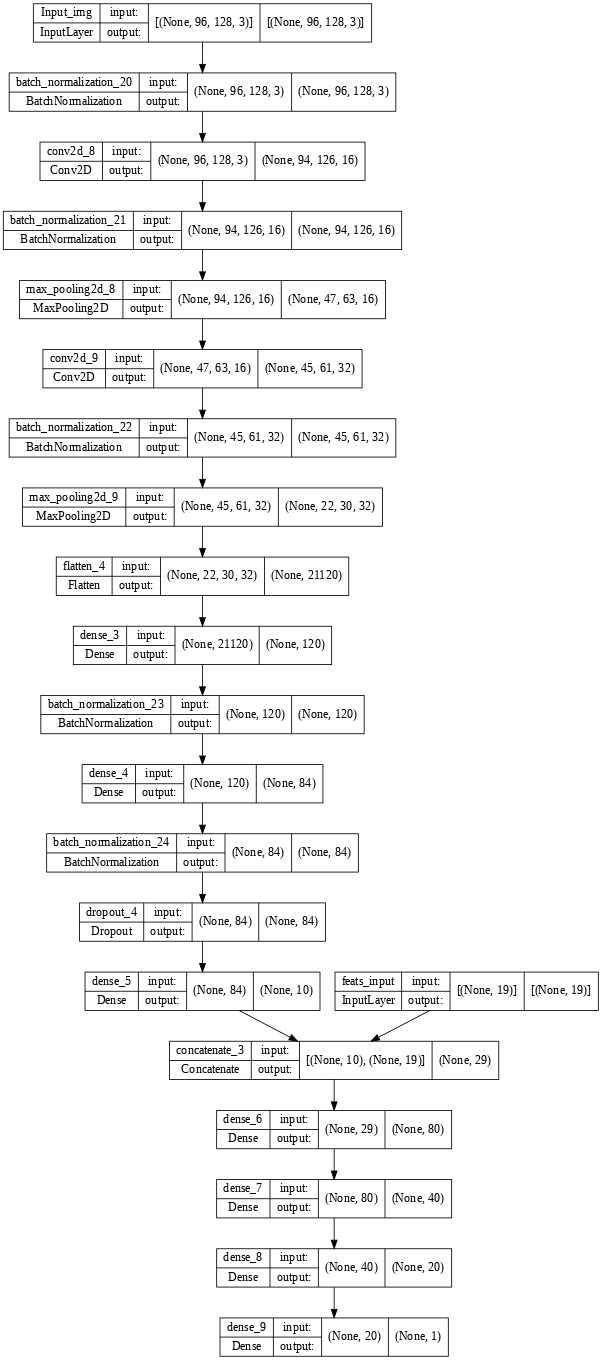

In [ ]:
keras.utils.plot_model( 
    model_1,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TD",
    dpi=60,
)

In [ ]:
model_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_img (InputLayer)         [(None, 96, 128, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 batch_normalization_5 (BatchNo  (None, 96, 128, 3)  12          ['Input_img[0][0]']              
 rmalization)                                                                                     
                                                                                                  
 conv2d_2 (Conv2D)              (None, 94, 126, 16)  432         ['batch_normalization_5[0][0]']  
                                                                                              

In [ ]:
model_1.load_weights('/content/drive/MyDrive/Curso-WorkingAnalyst/semana10/model_1')

In [ ]:
train_pred = model_1.predict([train_imgs_to_use, np.array(train_features)])

In [ ]:
train_targets

,price
id_annonce,
36063535,139000.0
35776405,226000.0
35739799,273500.0
36021087,470000.0
35857443,176000.0
...,...
36058247,565000.0
35868521,65000.0
35831921,599000.0


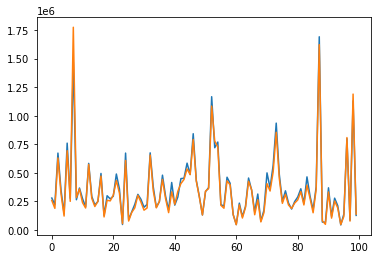

In [ ]:
plt.plot(range(100),train_targets['price'][1050:1150]) #range(len(train_targets))
plt.plot(range(100),train_pred[1050:1150])

In [ ]:
train_pred.shape

(5071, 1)

In [ ]:
mae_train = np.abs(train_pred.reshape(5071,) - train_targets['price']).sum()/5071
mae_train

27298.7040815344

In [ ]:
test_pred = model_1.predict([test_imgs_to_use, np.array(test_features)])

In [ ]:
test_pred

array([[545959.7 ],
       [184443.03],
       [271038.47],
       ...,
       [153420.47],
       [768006.4 ],
       [185845.16]], dtype=float32)

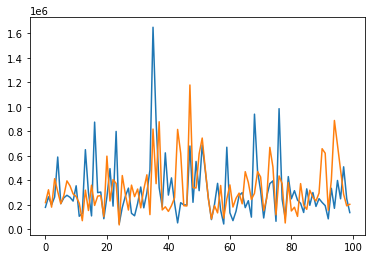

In [ ]:
plt.plot(range(100),test_targets['price'][1050:1150]) #range(len(train_targets))
plt.plot(range(100),test_pred[1050:1150])

In [ ]:
mae_test = np.abs(test_pred.reshape(5072,) - test_targets['price']).sum()/5072
mae_test

176221.85974275126

In [ ]:
# MUCHO CUIDADO AL CORRER ESTA CELDA
#model_1.save('/content/drive/MyDrive/Curso-WorkingAnalyst/semana10/model_1')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Curso-WorkingAnalyst/semana10/model_1/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Curso-WorkingAnalyst/semana10/model_1/assets


# Análisis

- ¿Qué está pasando con el modelo en los datos de train?
- ¿Cómo podríamos mejorar las predicciones en los datos de test?
- ¿Alrededor de que época creen que no había sobreajuste?

# Ejercicio:

Entrenar la red y gráficar la pérdida respecto al tiempo (tanto en datos de entrnamiento como datos de validación)